In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurment = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
# Abelardo: OBTIENE LA FECHA MAYOR
maxDate =  session.query(func.max(measurment.date)).scalar()
maxDate = datetime.strptime(maxDate, '%Y-%m-%d')
last12months = dt.date(maxDate.year, maxDate.month, maxDate.day)-dt.timedelta(days=365)
print("Fecha Maxima")
print(maxDate)
print("Fecha un Año atrás")
print(last12months)

Fecha Maxima
2017-08-23 00:00:00
Fecha un Año atrás
2016-08-23


In [11]:
#FILTRA UN AÑO ANTES
# Perform a query to retrieve the data and precipitation scores
query = session.query(measurment.date,measurment.prcp).filter(measurment.date>=last12months).all()
print(query)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [36]:
# Save the query results as a Pandas DataFrame and set the index to the date column
dataframe=pd.DataFrame(query,columns=['date', 'prcp'])
dataframe=dataframe.sort_values(by=['date','prcp'])
dataframe.set_index(dataframe['date'], inplace=True)
#print(dataframe)
# Sort the dataframe by date
#Abelardo: Ordena por fecha y valor de prcp
print(dataframe)

                  date  prcp
date                        
2016-08-23  2016-08-23  0.00
2016-08-23  2016-08-23  0.02
2016-08-23  2016-08-23  0.05
2016-08-23  2016-08-23  0.15
2016-08-23  2016-08-23  0.70
...                ...   ...
2017-08-22  2017-08-22  0.50
2017-08-23  2017-08-23  0.00
2017-08-23  2017-08-23  0.00
2017-08-23  2017-08-23  0.08
2017-08-23  2017-08-23  0.45

[2230 rows x 2 columns]


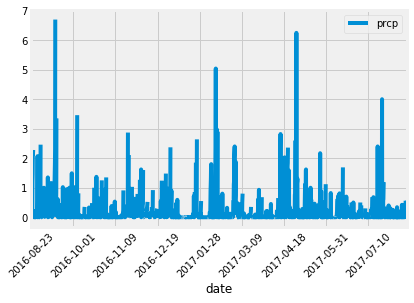

In [37]:
# Use Pandas Plotting with Matplotlib to plot the data
dataframe.plot(rot=45)

In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dataframe[["prcp"]].describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [65]:
# Design a query to show how many stations are available in this dataset?

stations=session.query(measurment.station).distinct().count()
print("Estaciones disponibles")
print(stations)

Estaciones disponibles
9


In [83]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#Abelardo: Agrupa la Data por Estación y Cuenta
agrupado=session.query(measurment.station, func.count(measurment.station)).group_by(measurment.station).all()

#Abelardo: Convierte la data en un Dataframe
dfAgrupado=pd.DataFrame(agrupado,columns=['station', 'count'])
print("Dataframe Agrupado")
print(dfAgrupado)

#Abelardo: Ordena el Dataframe por Count
dfOrdenado=dfAgrupado.sort_values("count")
print("Dataframe Ordenado")
print(dfOrdenado)


Dataframe Agrupado
       station  count
0  USC00511918   1979
1  USC00513117   2709
2  USC00514830   2202
3  USC00516128   2612
4  USC00517948   1372
5  USC00518838    511
6  USC00519281   2772
7  USC00519397   2724
8  USC00519523   2669
Dataframe Ordenado
       station  count
5  USC00518838    511
4  USC00517948   1372
0  USC00511918   1979
2  USC00514830   2202
3  USC00516128   2612
8  USC00519523   2669
1  USC00513117   2709
7  USC00519397   2724
6  USC00519281   2772


In [105]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
dfOrdenado.set_index(dfOrdenado['station'], inplace=True)
idMax=dfOrdenado.loc[dfOrdenado['count'].idxmax()]
estacionMaxima=idMax["station"]
print("Eación con el count más alto")
print(estacionMaxima)

Eación con el count más alto
USC00519281


In [116]:
#Medicion de Temperaturas y promedio de temperaturas
queryEstacion = session.query(measurment.tobs).filter(measurment.station==estacionMaxima).all()
#print(queryEstacion)
dfTemperaturas=pd.DataFrame(queryEstacion,columns=['tempraturas'])
#print(dfTemperaturas)
print("Temperatura Mínima")
print(dfTemperaturas["tempraturas"].min())
print("Temperatura Maxima")
print(dfTemperaturas["tempraturas"].max())
print("Promedio Temperaturas")
print(dfTemperaturas["tempraturas"].mean())

Temperatura Mínima
54.0
Temperatura Maxima
85.0
Promedio Temperaturas
71.66378066378067


In [137]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
queryStation = session.query(measurment.station,measurment.date,measurment.tobs).filter(measurment.date>=last12months,measurment.station==estacionMaxima).all()
dataframeStation=pd.DataFrame(queryStation,columns=['station','date','tobs'])
#dataframeStation=dataframeStation.sort_values(by=['date','tobs'])
dataframeStation.set_index(dataframeStation['date'], inplace=True)
print(dataframeStation)

                station        date  tobs
date                                     
2016-08-23  USC00519281  2016-08-23  77.0
2016-08-24  USC00519281  2016-08-24  77.0
2016-08-25  USC00519281  2016-08-25  80.0
2016-08-26  USC00519281  2016-08-26  80.0
2016-08-27  USC00519281  2016-08-27  75.0
...                 ...         ...   ...
2017-08-14  USC00519281  2017-08-14  77.0
2017-08-15  USC00519281  2017-08-15  77.0
2017-08-16  USC00519281  2017-08-16  76.0
2017-08-17  USC00519281  2017-08-17  76.0
2017-08-18  USC00519281  2017-08-18  79.0

[352 rows x 3 columns]


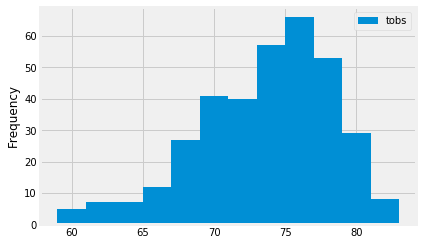

In [139]:
dataframeStation.plot.hist(bins=12)